In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import cufflinks as cf
#cf.go_offline()

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.feature_selection import SelectFromModel
#from sklearn.preprocessing import StandardScaler, Imputer

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2

from sklearn.feature_selection import f_classif, f_regression

from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LinearRegression

from sklearn import preprocessing
from sklearn import utils

from sklearn import metrics

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

In [75]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVR, SVC

import scipy.stats as stats 

from sklearn.preprocessing import FunctionTransformer, PowerTransformer 

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import RobustScaler

import xgboost as xgb

from sklearn.model_selection import learning_curve

from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_curve

In [76]:
from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from numpy import arange
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [107]:
data = pd.read_excel('SVM-m.xlsx')
data.head()

,Surface_temperature,Concentration,Grip,Precipitation,Conductivity,Chemical,Snow_height,Base_temperature,Efficiency
0,0.379094,0.015162,0.971859,0.018224,0.500500,0.030556,0.022255,0.153022,1
1,0.379094,0.014596,0.971859,0.018224,0.500500,0.024645,0.022255,0.142163,-1
2,0.382563,0.014596,0.971859,0.018224,0.500500,0.024645,0.022255,0.142163,-1
3,0.389500,0.014879,0.971859,0.018224,0.512116,0.030556,0.022255,0.142163,1
4,0.386031,0.015445,0.971859,0.018224,0.523733,0.030556,0.022255,0.142163,1


In [108]:
X_train, X_test, y_train, y_test = train_test_split(data.drop
                                                    (labels='Efficiency',axis=1),
                                                    data['Efficiency'], 
                                                    test_size=0.3, random_state=0)

In [109]:
roc_values = []
for feature in X_train.columns:
    clf =SVC(C=995.59, gamma=9.78)
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored))

In [110]:
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False)

Conductivity           0.734306
Base_temperature       0.669259
Grip                   0.667075
Chemical               0.619398
Concentration          0.613952
Surface_temperature    0.602426
Snow_height            0.590156
Precipitation          0.583338
dtype: float64

Text(0.5, 1.03, 'Importance of Input Variables for WRM Efficiency')

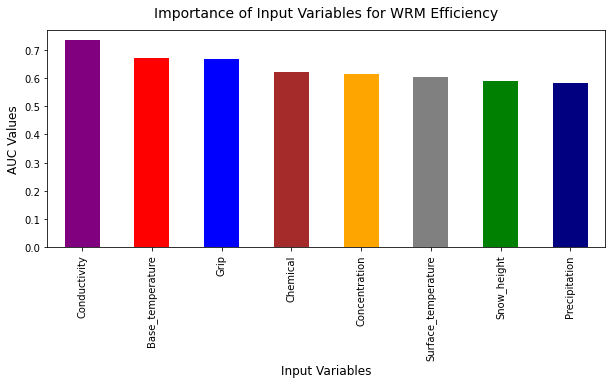

In [114]:
roc_values.sort_values(ascending=False).plot.bar(figsize=(10,4),color=['purple', 'red', 'blue', 'brown', 
                                                                      'orange', 'gray','green','navy'])
plt.ylabel('AUC Values', fontsize = 12)
plt.xlabel('Input Variables', fontsize = 12)
plt.title('Importance of Input Variables for WRM Efficiency', fontsize = 14, y = 1.03)